In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.load the dataset

In [4]:
df=pd.read_csv('Wind turbine.csv')
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [6]:
df = pd.read_csv('wind turbine.csv')
df.columns = ['date', 'active_power', 'wind_speed', 'theor_power', 'wind_dir']
df

,date,active_power,wind_speed,theor_power,wind_dir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [7]:
# Convert to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set date column as index
df.set_index('date', inplace=True)

df

,active_power,wind_speed,theor_power,wind_dir
date,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


## 2. Time series analysis

<AxesSubplot:xlabel='date', ylabel='Active Power (kWh)'>

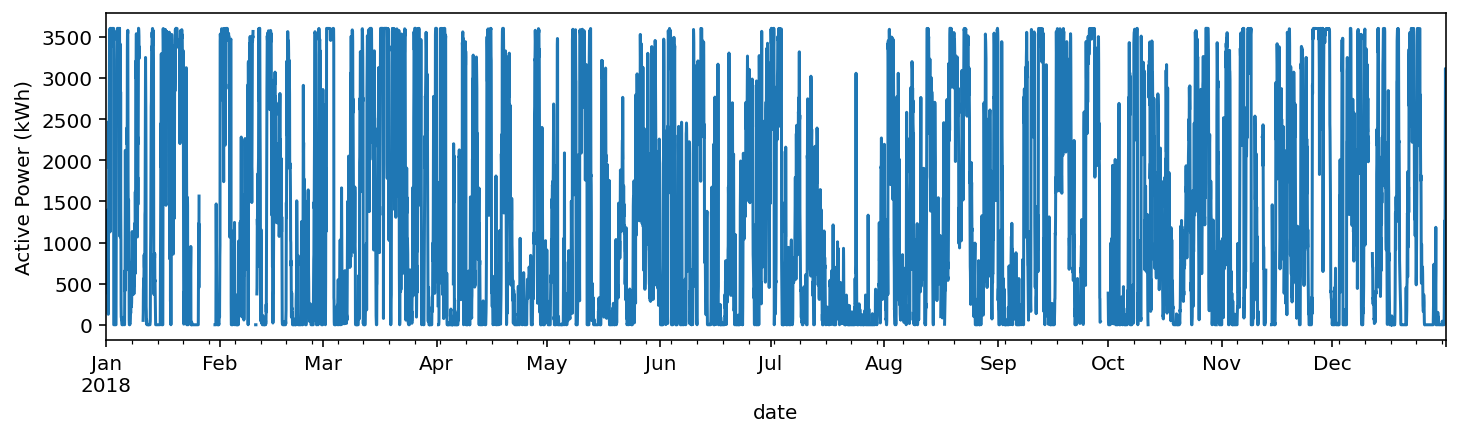

In [8]:
# Resample hourly average power and plot
df.resample('H').mean().active_power.plot(figsize=(12,3), ylabel='Active Power (kWh)')

In [9]:
dates = df.index
hours = [date.hour for date in dates]
df['hour'] = hours

df

,active_power,wind_speed,theor_power,wind_dir,hour
date,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0
...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23


<AxesSubplot:title={'center':'Average of Active Power of each Hours'}, xlabel='hour'>

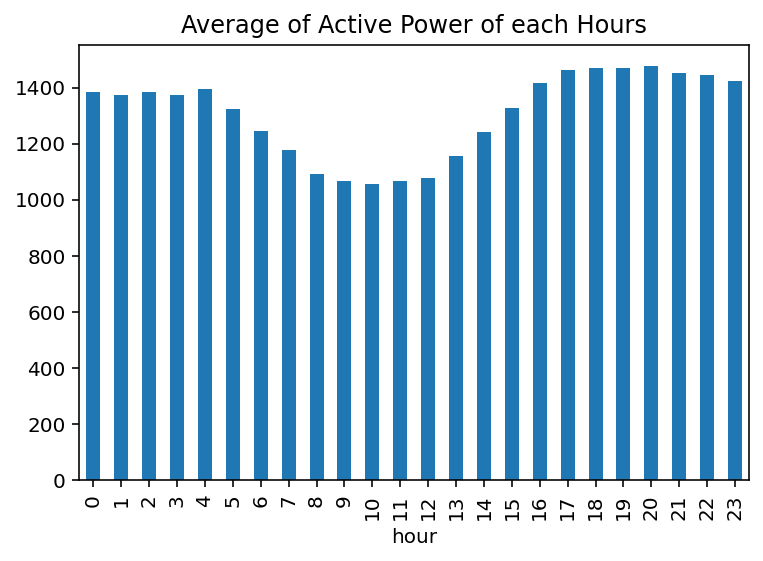

In [10]:
df.groupby('hour').mean().active_power.plot(kind='bar', title='Average of Active Power of each Hours')

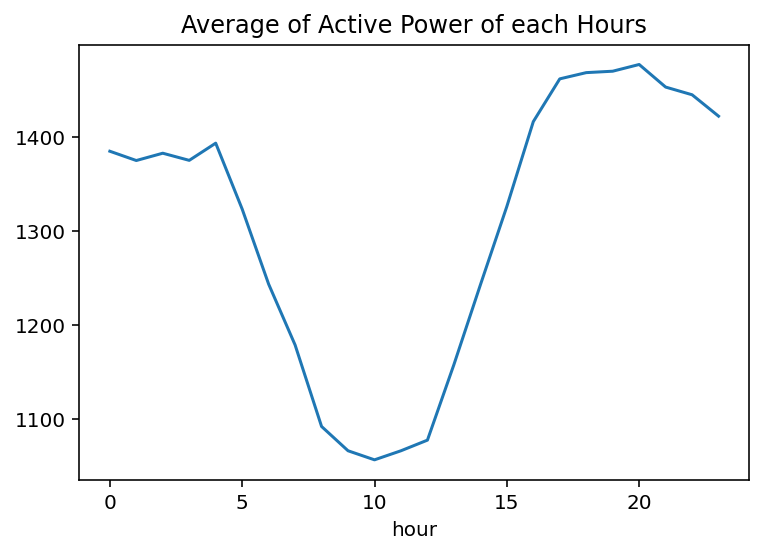

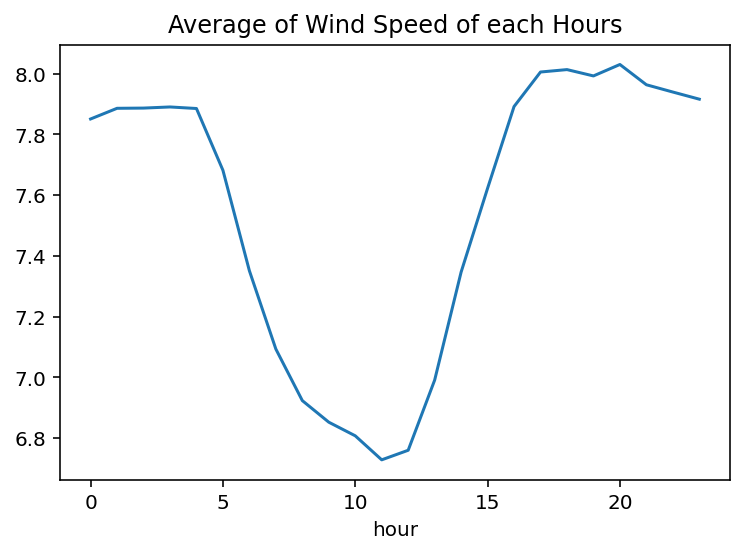

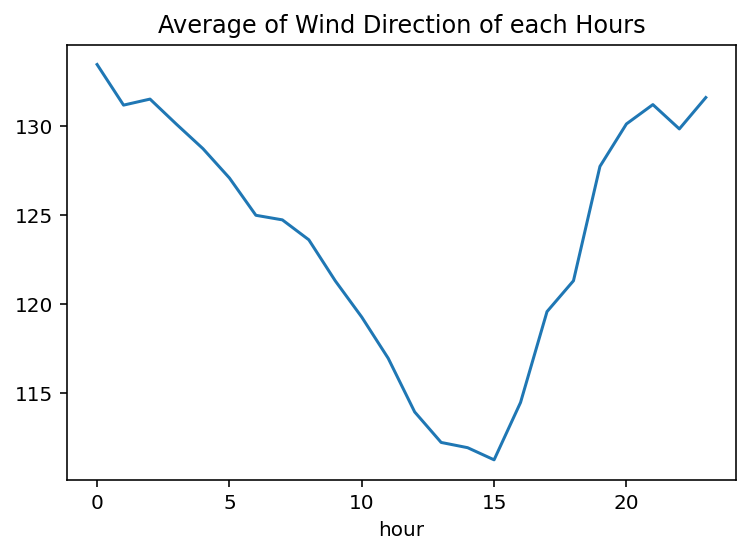

In [11]:
df.groupby('hour').mean().active_power.plot(title='Average of Active Power of each Hours')
plt.show()

df.groupby('hour').mean().wind_speed.plot(title='Average of Wind Speed of each Hours')
plt.show()

df.groupby('hour').mean().wind_dir.plot(title='Average of Wind Direction of each Hours')
plt.show()

## Monthly and weekly analysis

In [12]:
dates = df.index
months = [date.month for date in dates]
df['month'] = months
df

,active_power,wind_speed,theor_power,wind_dir,hour,month
date,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1
...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12


In [14]:
color = list(np.full(12, 'grey'))
color[2] = 'blue'
color

['grey',
 'grey',
 'blue',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey']

Text(0, 0.5, 'Active Power [kW]')

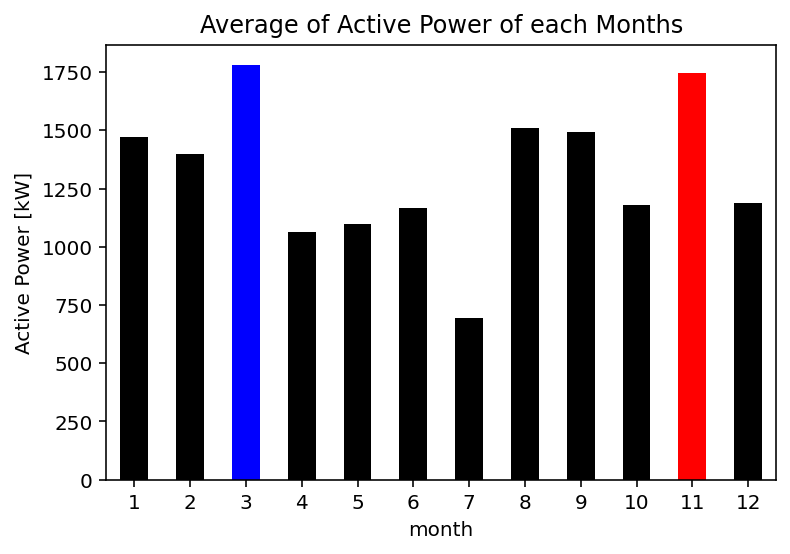

In [15]:
color = list(np.full(12, 'black'))
color[2], color[10] = 'blue', 'red'

df.groupby('month').mean().active_power.plot(kind='bar', title='Average of Active Power of each Months', color=color, rot=0)
plt.ylabel('Active Power [kW]')

In [21]:
# Resample weekly average power and plot

<AxesSubplot:xlabel='date'>

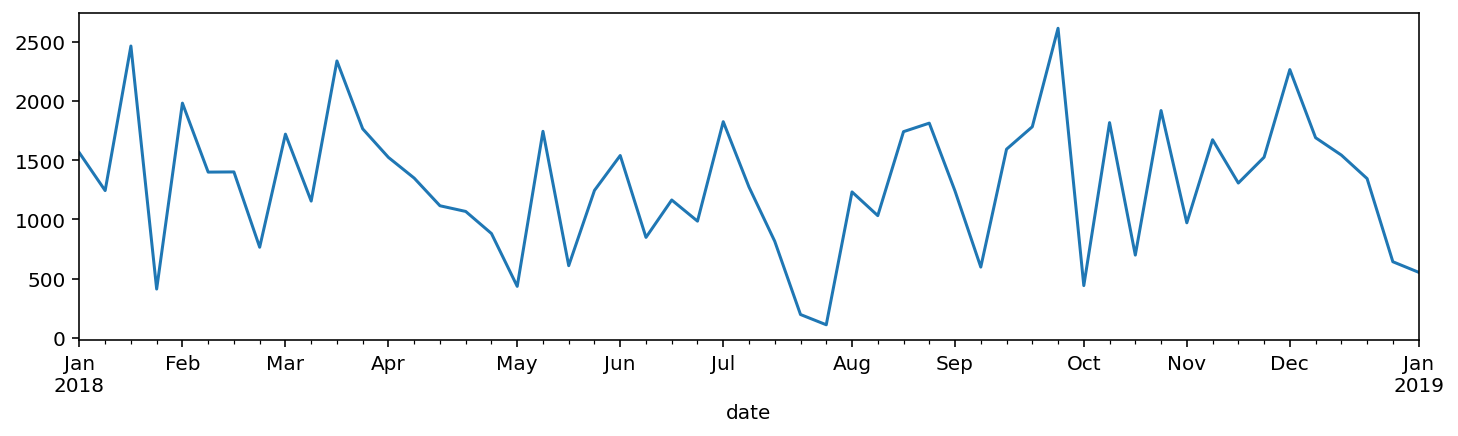

In [16]:
df.resample('W').mean().active_power.plot(figsize=(12,3))

In [20]:
# Resample monthly average power and plot

<AxesSubplot:xlabel='date'>

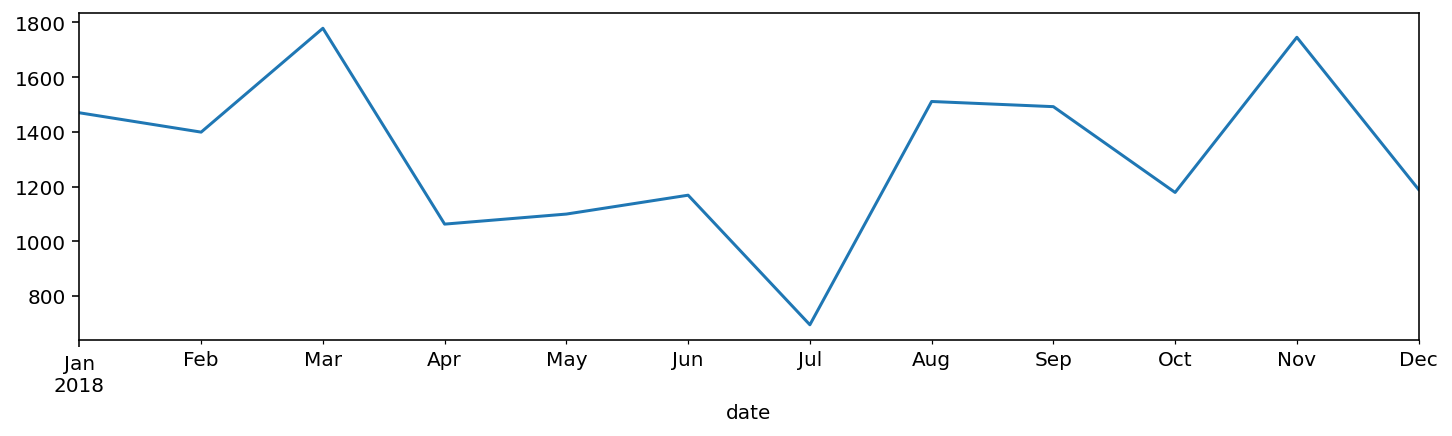

In [17]:
df.resample('M').mean().active_power.plot(figsize=(12,3))


In [18]:
# Calculate power loss

In [19]:
df['loss'] = df['theor_power'] - df['active_power']
df

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss
date,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12,433.209835
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12,-511.297256
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12,-412.822178


<AxesSubplot:xlabel='date'>

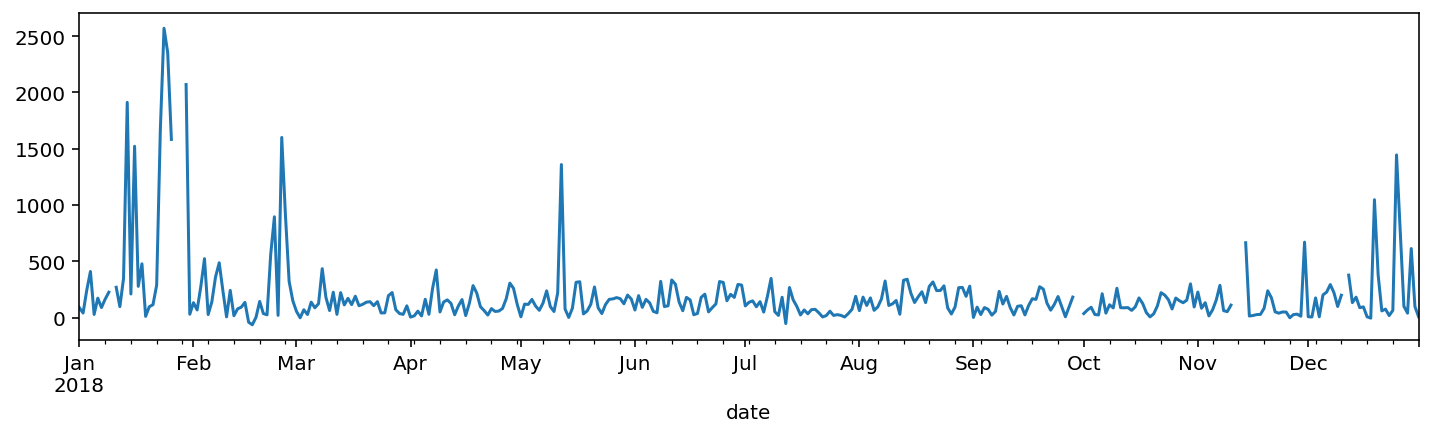

In [22]:
# Resample weekly average loss and plot
df.resample('D').mean().loss.plot(figsize=(12,3))

## 3. Wind power curve analysis

<AxesSubplot:xlabel='wind_speed'>

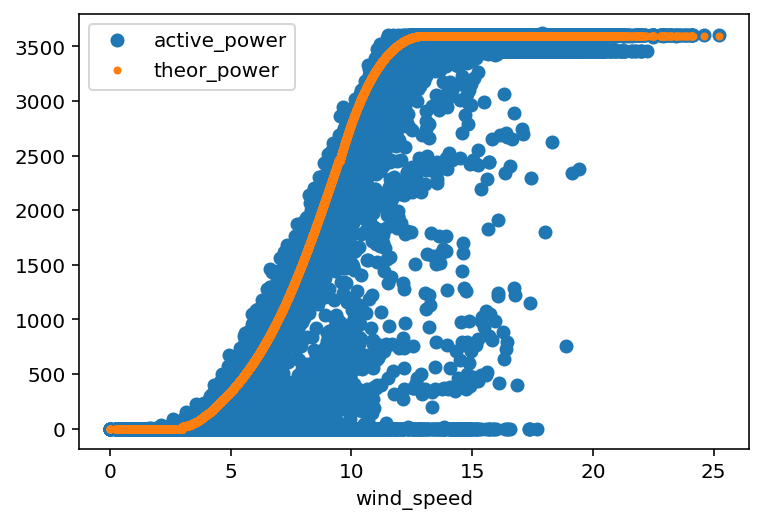

In [23]:
ax = df.plot(x='wind_speed', y='active_power', style='o')
df.plot(x='wind_speed', y='theor_power', style='.', ax=ax)

In [24]:
interval = np.arange(0.25,26,0.5)
df.groupby(pd.cut(df['wind_speed'], interval)).mean().head(10)

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss
wind_speed,,,,,,,
"(0.25, 0.75]",0.000000,0.576992,0.000000,165.932577,11.127820,6.917293,0.000000
"(0.75, 1.25]",0.000505,1.017500,0.000000,177.411613,11.295671,7.026399,-0.000505
"(1.25, 1.75]",0.004856,1.513483,0.000000,174.603221,10.741866,6.890094,-0.004856
"(1.75, 2.25]",0.049437,2.009288,0.000000,170.506608,10.909741,6.815080,-0.049437
"(2.25, 2.75]",0.492883,2.508442,0.000000,161.085363,11.185185,6.690108,-0.492883
"(2.75, 3.25]",4.720572,3.004436,11.182960,153.013080,10.738693,6.503426,6.462388
"(3.25, 3.75]",25.595717,3.495974,53.255856,142.912788,11.095670,6.480866,27.660139
"(3.75, 4.25]",86.081460,4.006528,127.311184,136.855815,11.398386,6.618759,41.229725
"(4.25, 4.75]",167.611188,4.496874,221.949518,128.407628,11.831386,6.674962,54.338330


<AxesSubplot:xlabel='wind_speed'>

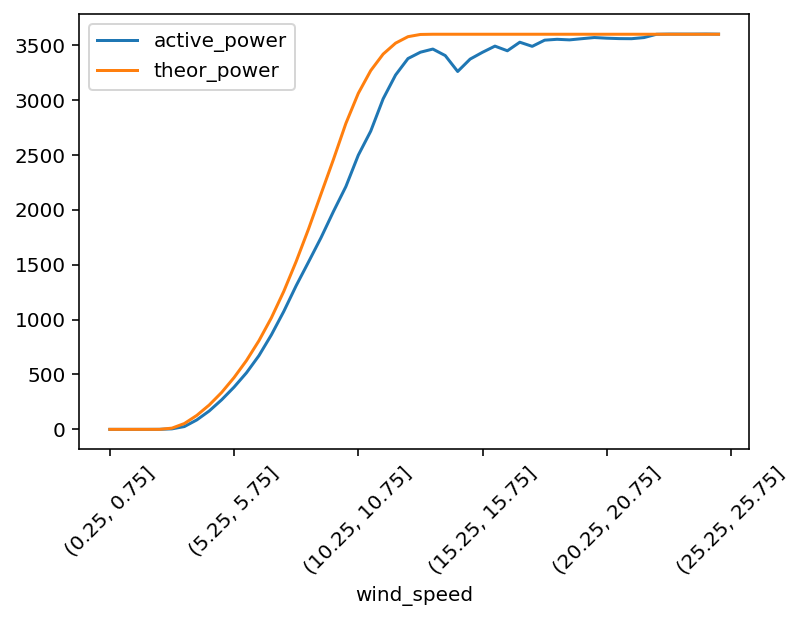

In [25]:
df.groupby(pd.cut(df['wind_speed'], interval)).mean().plot(y=['active_power', 'theor_power'], rot=45)

In [26]:
# A better look plot. This will display the mean value 0.5, 1, 1.5, etc., instead of the bins

def mean_power_curve(df):
    # Group by wind speed
    groups = df.groupby(pd.cut(df['wind_speed'], interval))

    mean_speed = []
    for key, item in groups:
        # Get keys from groupby method
        c = np.str(key)
        string = c[1:-1]
        string = string.split(', ')
        bounds = [float(i) for i in string]
        mean = np.mean(bounds)
        mean_speed.append(mean)

    # Take average of grouped df
    df_mean_speed = groups.mean()

    # Add mean speed to dataframe
    df_mean_speed['mean_speed'] = mean_speed

    # Plot
    df_mean_speed.plot(x='mean_speed', y=['theor_power', 'active_power'], style='.-')

C:\Users\bala\AppData\Local\Temp\ipykernel_6960\2332372307.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.str(key)


Text(0.5, 1.0, 'Mean Power Curve')

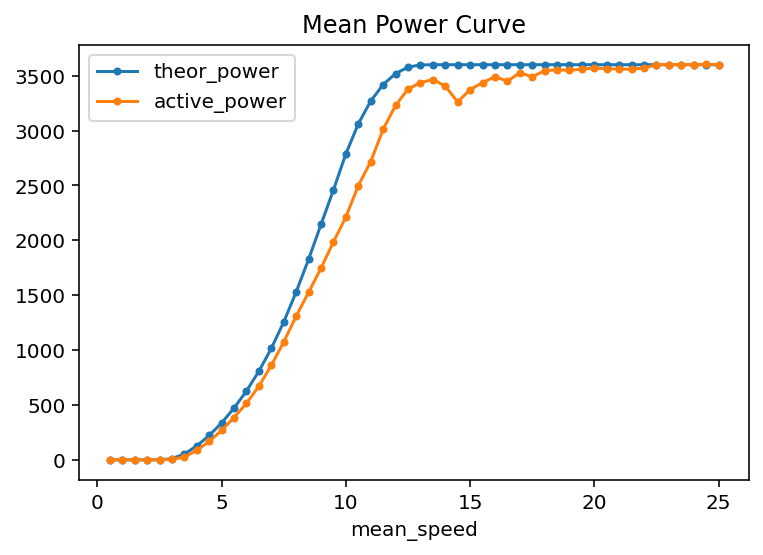

In [27]:
mean_power_curve(df)
plt.title('Mean Power Curve')
# plt.xlim(0,5)

## 4. Directivity analysis (+ power curve, again)

In [29]:
# create a function for a categorical column 
def direction(x):
    if x > 348.75 or x<11.25: return 'N'
    if x < 33.75: return 'NNE'
    if x < 56.25: return 'NE'
    if x < 78.75: return 'ENE'
    if x < 101.25: return 'E'
    if x < 123.75: return 'ESE'
    if x < 146.25: return 'SE'
    if x < 168.75: return 'SSE'
    if x < 191.25: return 'S'
    if x < 213.75: return 'SSW'
    if x < 236.25: return 'SW'
    if x < 258.75: return 'WSW'
    if x < 281.25: return 'W'
    if x < 303.75: return 'WNW'
    if x < 326.25: return 'NW'
    else: return 'NNW'

In [30]:
df['direction'] = df['wind_dir'].apply(direction)
df

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12,433.209835,E
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12,-511.297256,E
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12,-412.822178,E


C:\Users\bala\AppData\Local\Temp\ipykernel_6960\2332372307.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.str(key)
C:\Users\bala\AppData\Local\Temp\ipykernel_6960\2332372307.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.str(key)
C:\Users\bala\AppData\Local\Temp\ipykernel_6960\2332372307.py:10: DeprecationWarning: `np.str` is a de

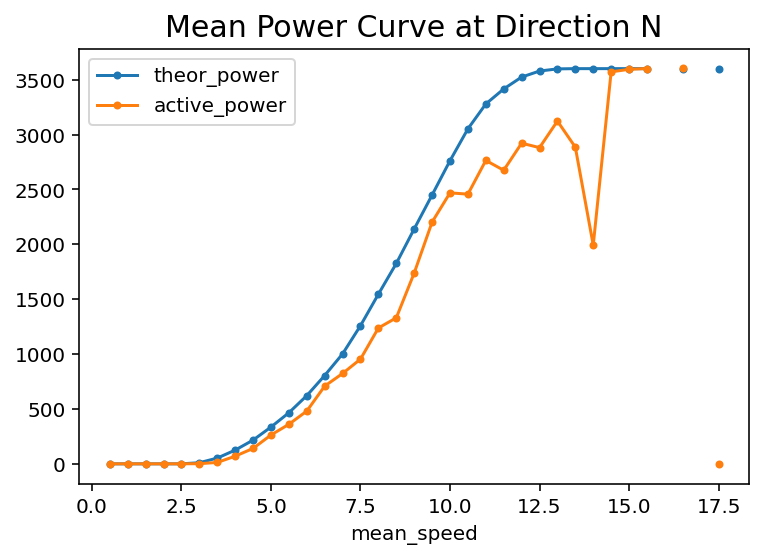

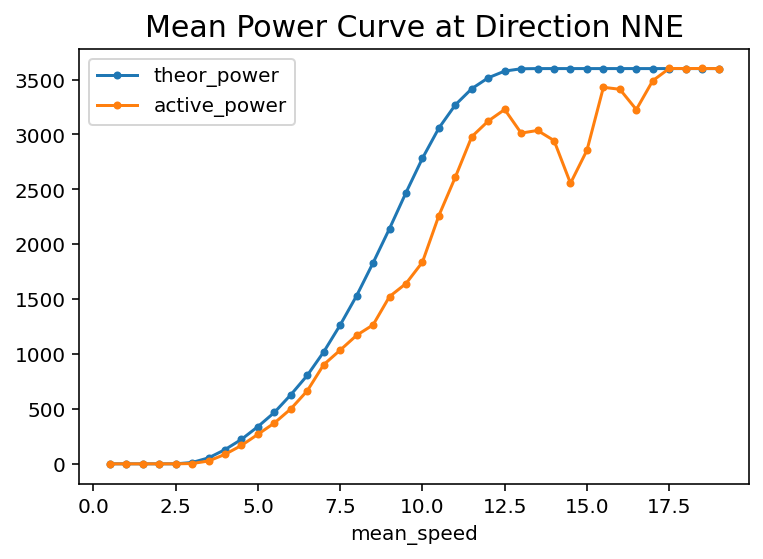

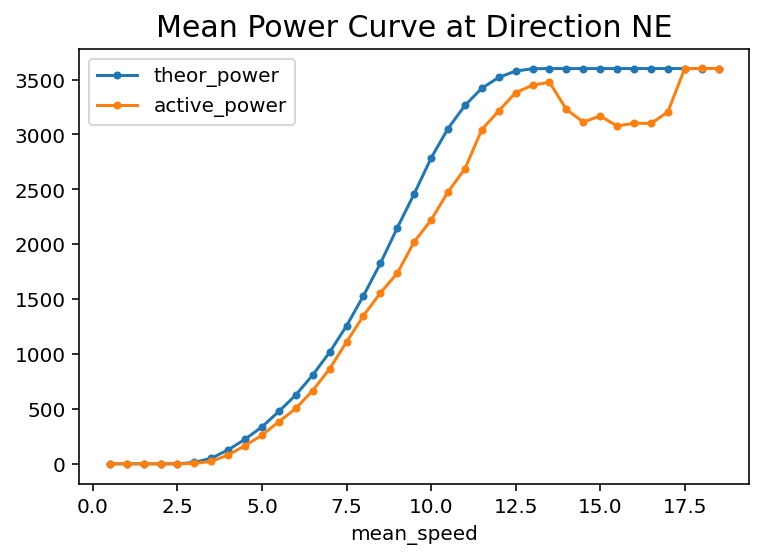

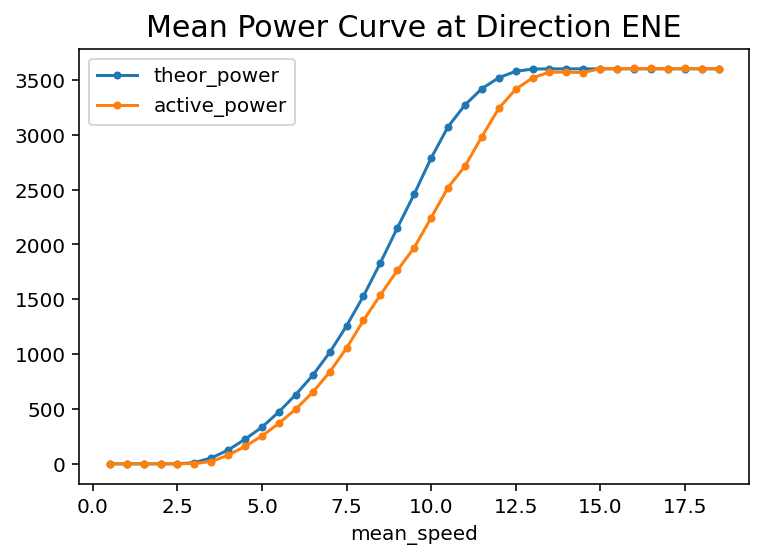

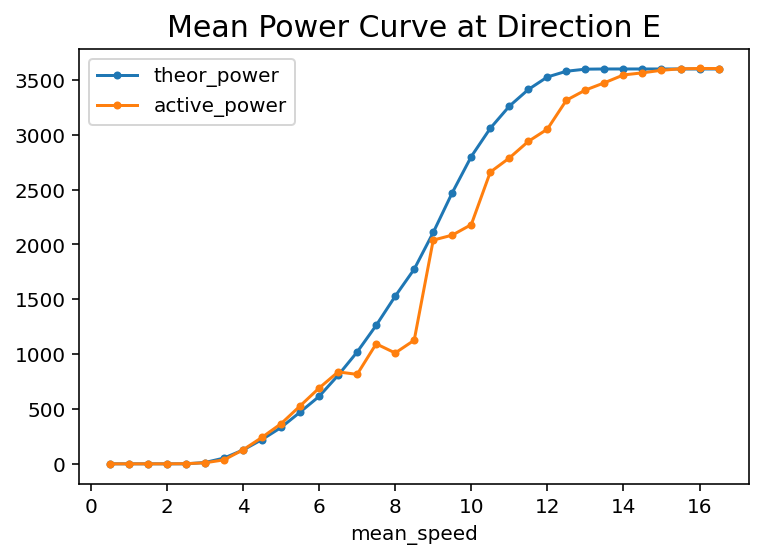

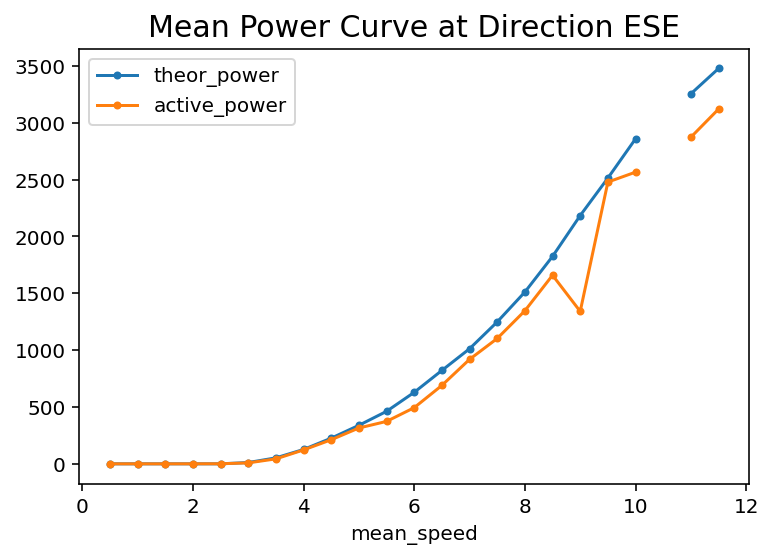

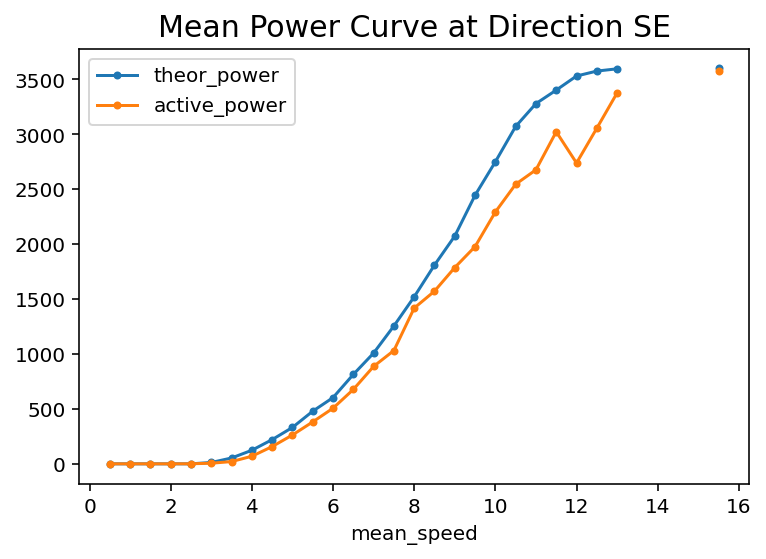

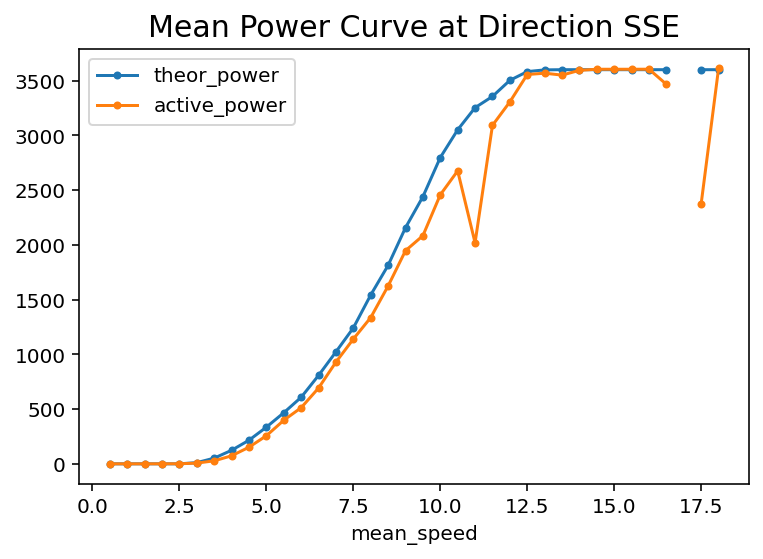

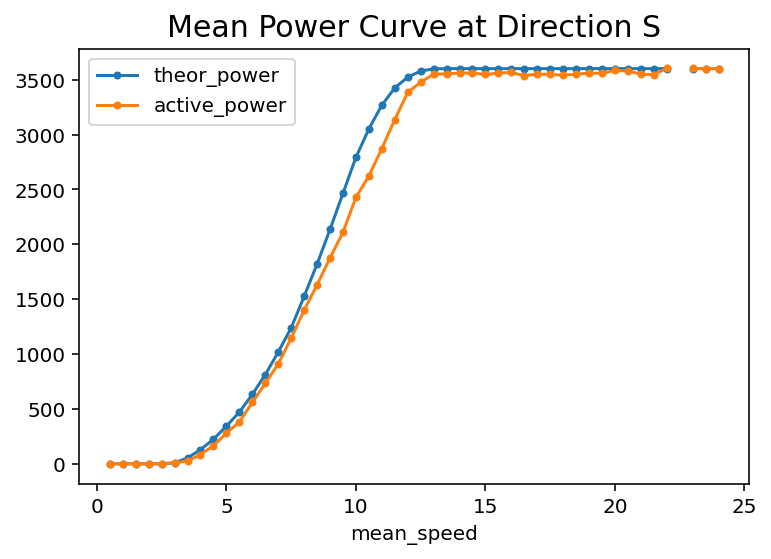

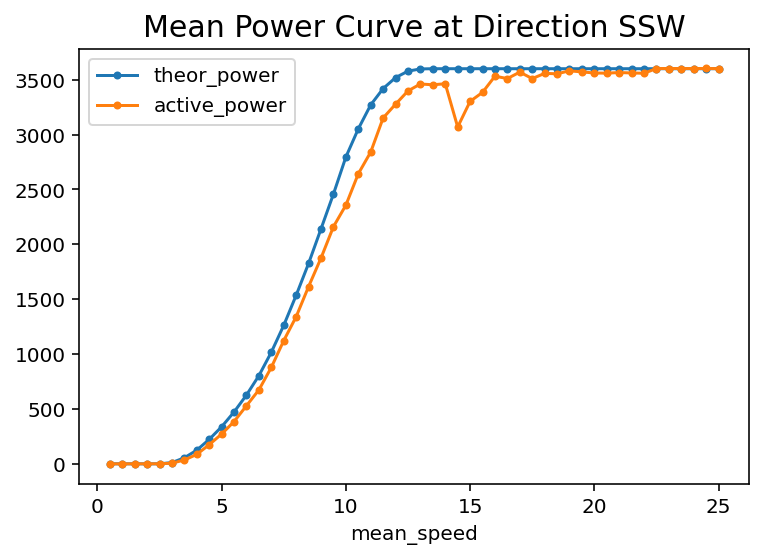

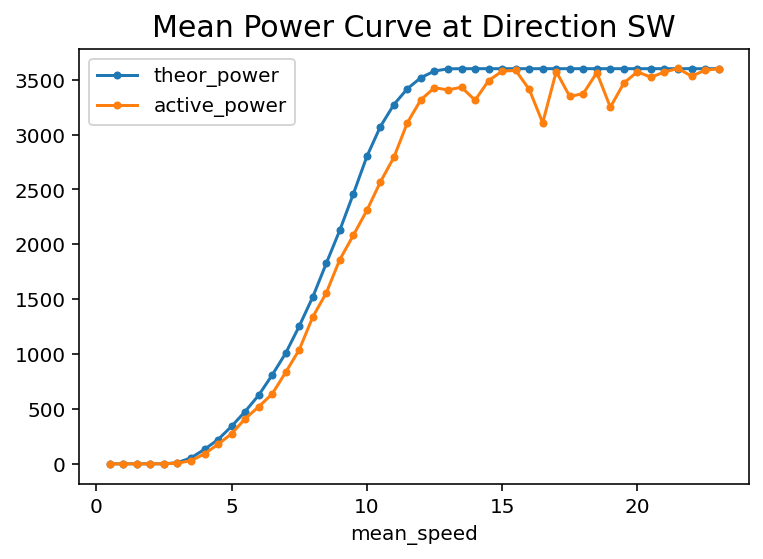

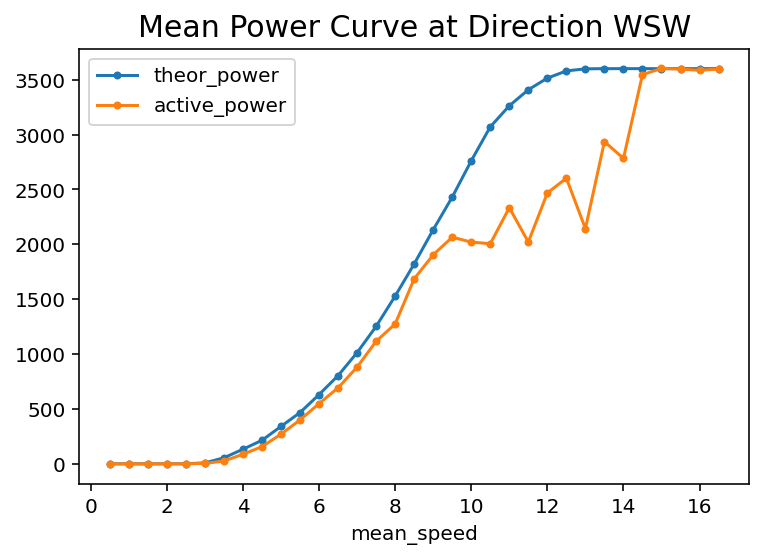

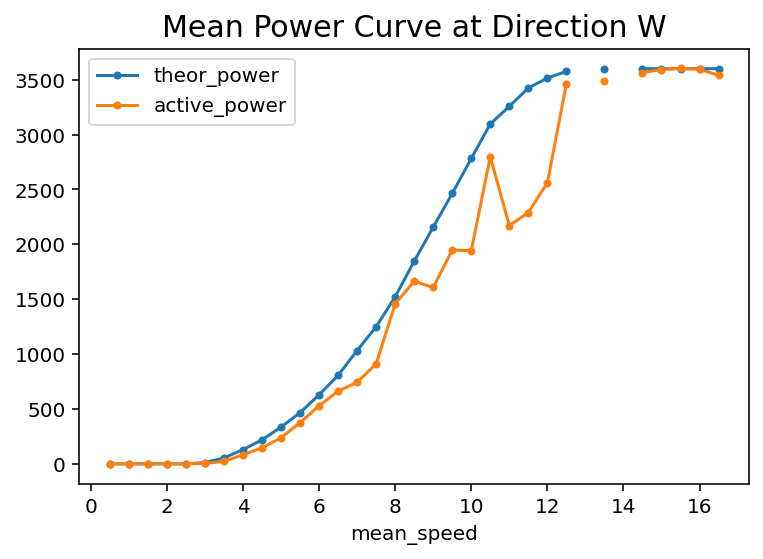

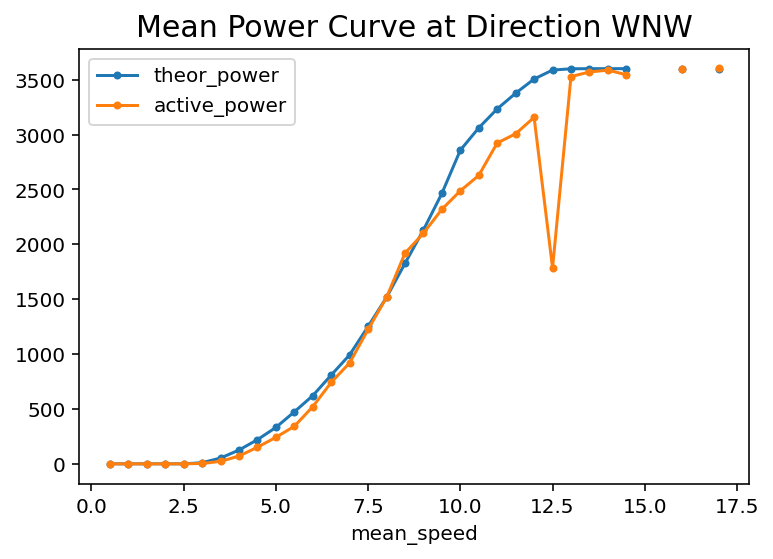

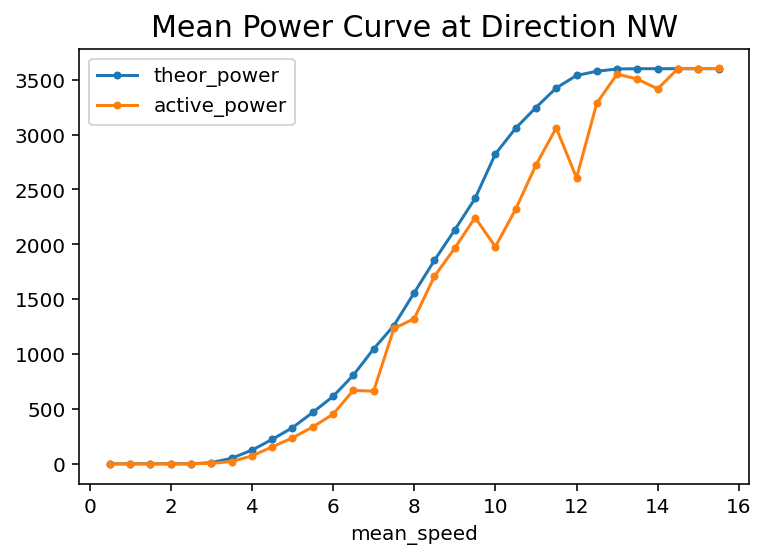

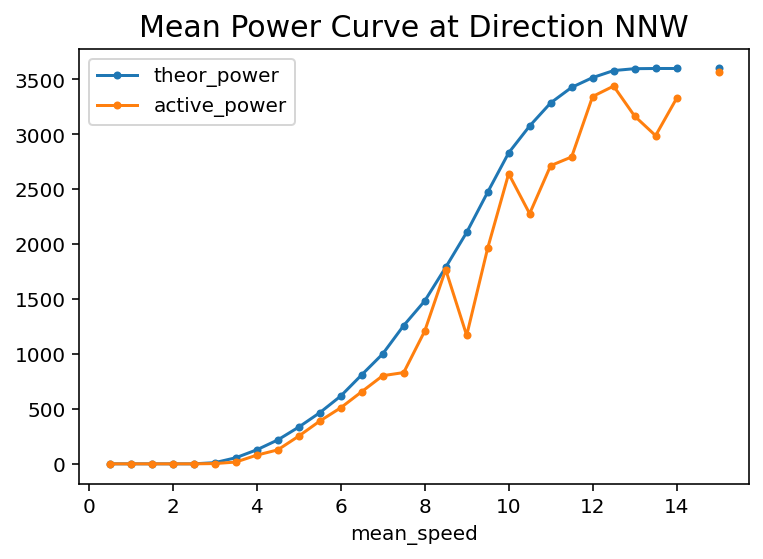

In [32]:
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

for d in directions:
    # Dataframe from one direction
    df_d = df[df.direction==d]
    # Plot mean power curve
    mean_power_curve(df_d)
    plt.title(f'Mean Power Curve at Direction {d}', size=15)
#     plt.xlim(0,5)

<AxesSubplot:title={'center':'Total Power Loss (kWh)'}, xlabel='direction'>

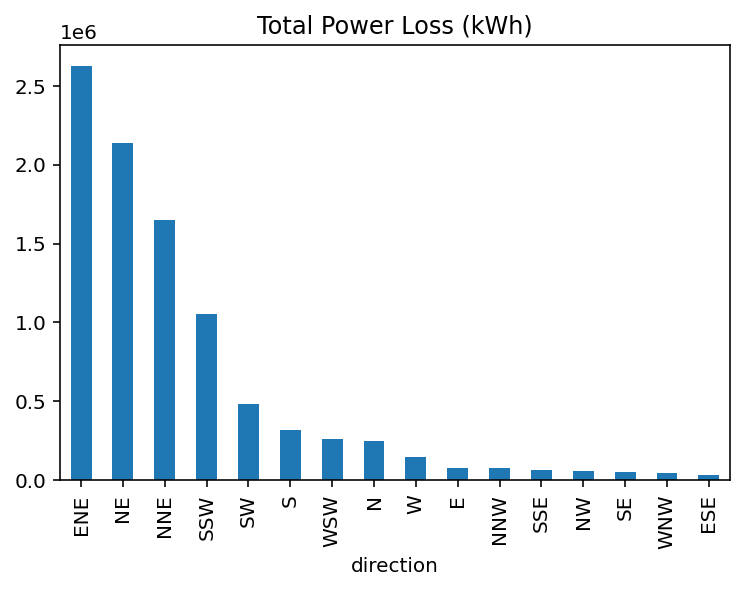

In [33]:
df.groupby('direction').loss.sum().sort_values(ascending=False).plot(kind='bar', title='Total Power Loss (kWh)')

<AxesSubplot:title={'center':'Wind Speed (m/s)'}, xlabel='direction'>

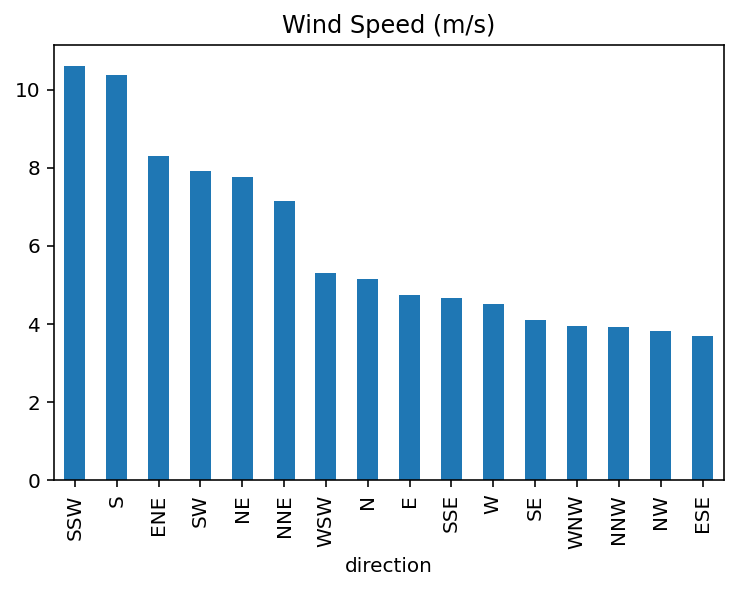

In [34]:
df.groupby('direction').wind_speed.mean().sort_values(ascending=False).plot(kind='bar', title='Wind Speed (m/s)')

In [35]:
# #function to create x,y component of wind direction 
# def x_y_component(wind_direction, wind_speed):
#     """
#     Convert degrees to x,y components
#     """
#     #convert to radians 
#     radians = (wind_direction * np.pi)/180
#     # give the x, y compenents 
#     x = wind_speed * np.cos(radians)
#     y = wind_speed * np.sin(radians)
    
#     return x,y

In [37]:
# # Calculate wind speed 
#wind_speed_x, wind_speed_y = x_y_component(df.wind_dir.values, df.wind_speed.values)
#df['wind_speed_x'] = wind_speed_x
#df['wind_speed_y'] = wind_speed_y
#df

## 5. Preparation for ML - Data cleansing, EDA

## Cleansing

In [38]:
df2 = df.copy()
df_outlier_removed = df2[df2.active_power>0]
df_outlier_removed


,active_power,wind_speed,theor_power,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12,433.209835,E
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12,-511.297256,E
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12,-412.822178,E


## Outliers

In [39]:
df_outlier_removed[(df_outlier_removed.wind_speed<=3.5) & (df_outlier_removed.active_power!=0)]

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 12:30:00,41.947239,3.253968,29.286956,233.065903,12,1,-12.660283,SW
2018-03-01 15:30:00,7.347679,3.011371,16.374212,238.690598,15,3,9.026533,WSW
2018-03-01 15:50:00,12.344200,3.246252,28.731272,238.076508,15,3,16.387072,WSW
2018-05-01 07:30:00,13.934310,3.227394,27.413258,62.523109,7,5,13.478948,ENE
2018-05-01 08:10:00,22.780531,3.310203,33.624574,74.864113,8,5,10.844043,ENE
...,...,...,...,...,...,...,...,...
2018-12-18 01:40:00,6.939387,3.133558,21.700877,49.132389,1,12,14.761490,NE
2018-12-21 05:40:00,20.305180,2.648756,0.000000,175.433197,5,12,-20.305180,S
2018-12-21 05:50:00,4.730608,2.157747,0.000000,172.074402,5,12,-4.730608,S


<AxesSubplot:xlabel='date'>

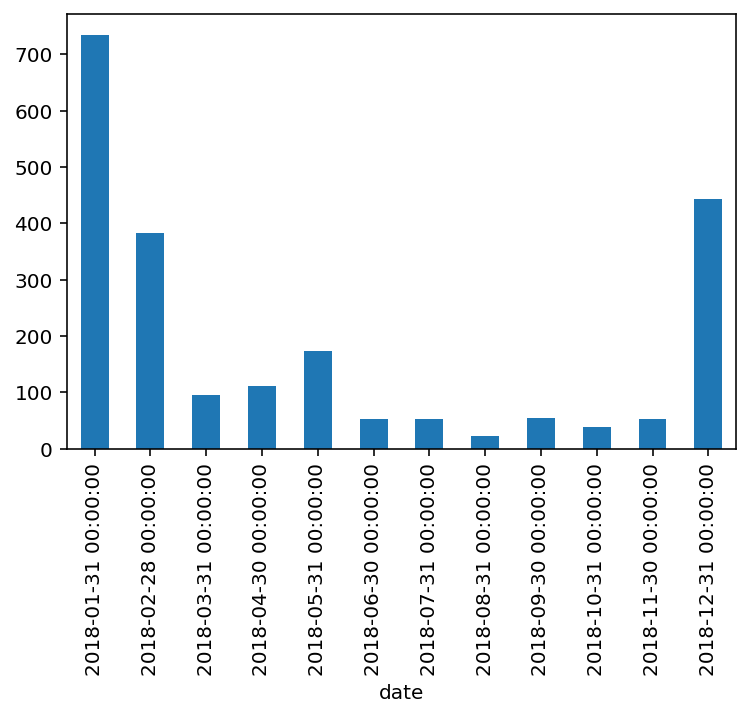

In [40]:
df_zero_power = df[(df.active_power==0) & (df.theor_power!=0) & (df.wind_speed>3.5)]
df_zero_power.resample('M').count().active_power.plot(kind='bar')

<AxesSubplot:xlabel='date'>

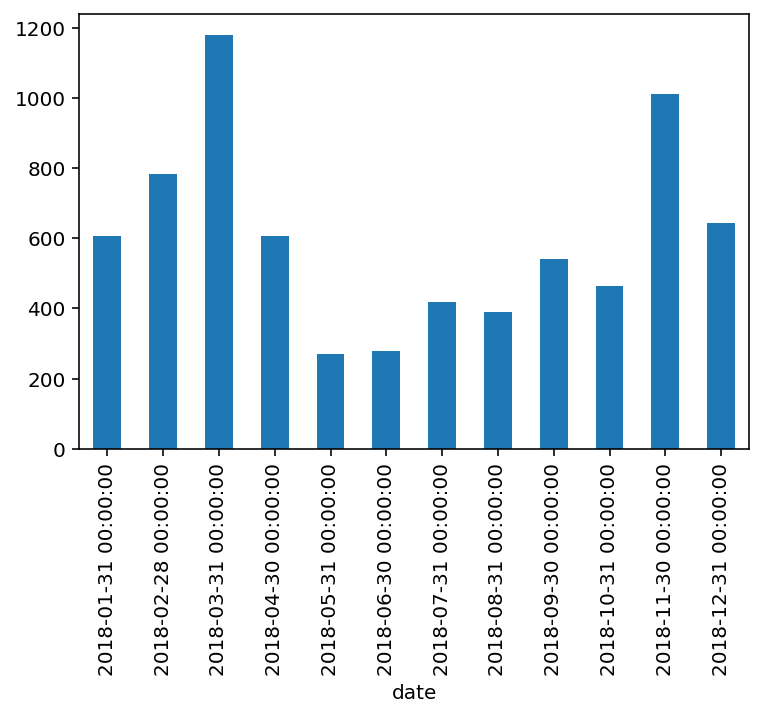

In [41]:
df[(df.active_power>df.theor_power)].resample('M').count().active_power.plot(kind='bar')

## EDA

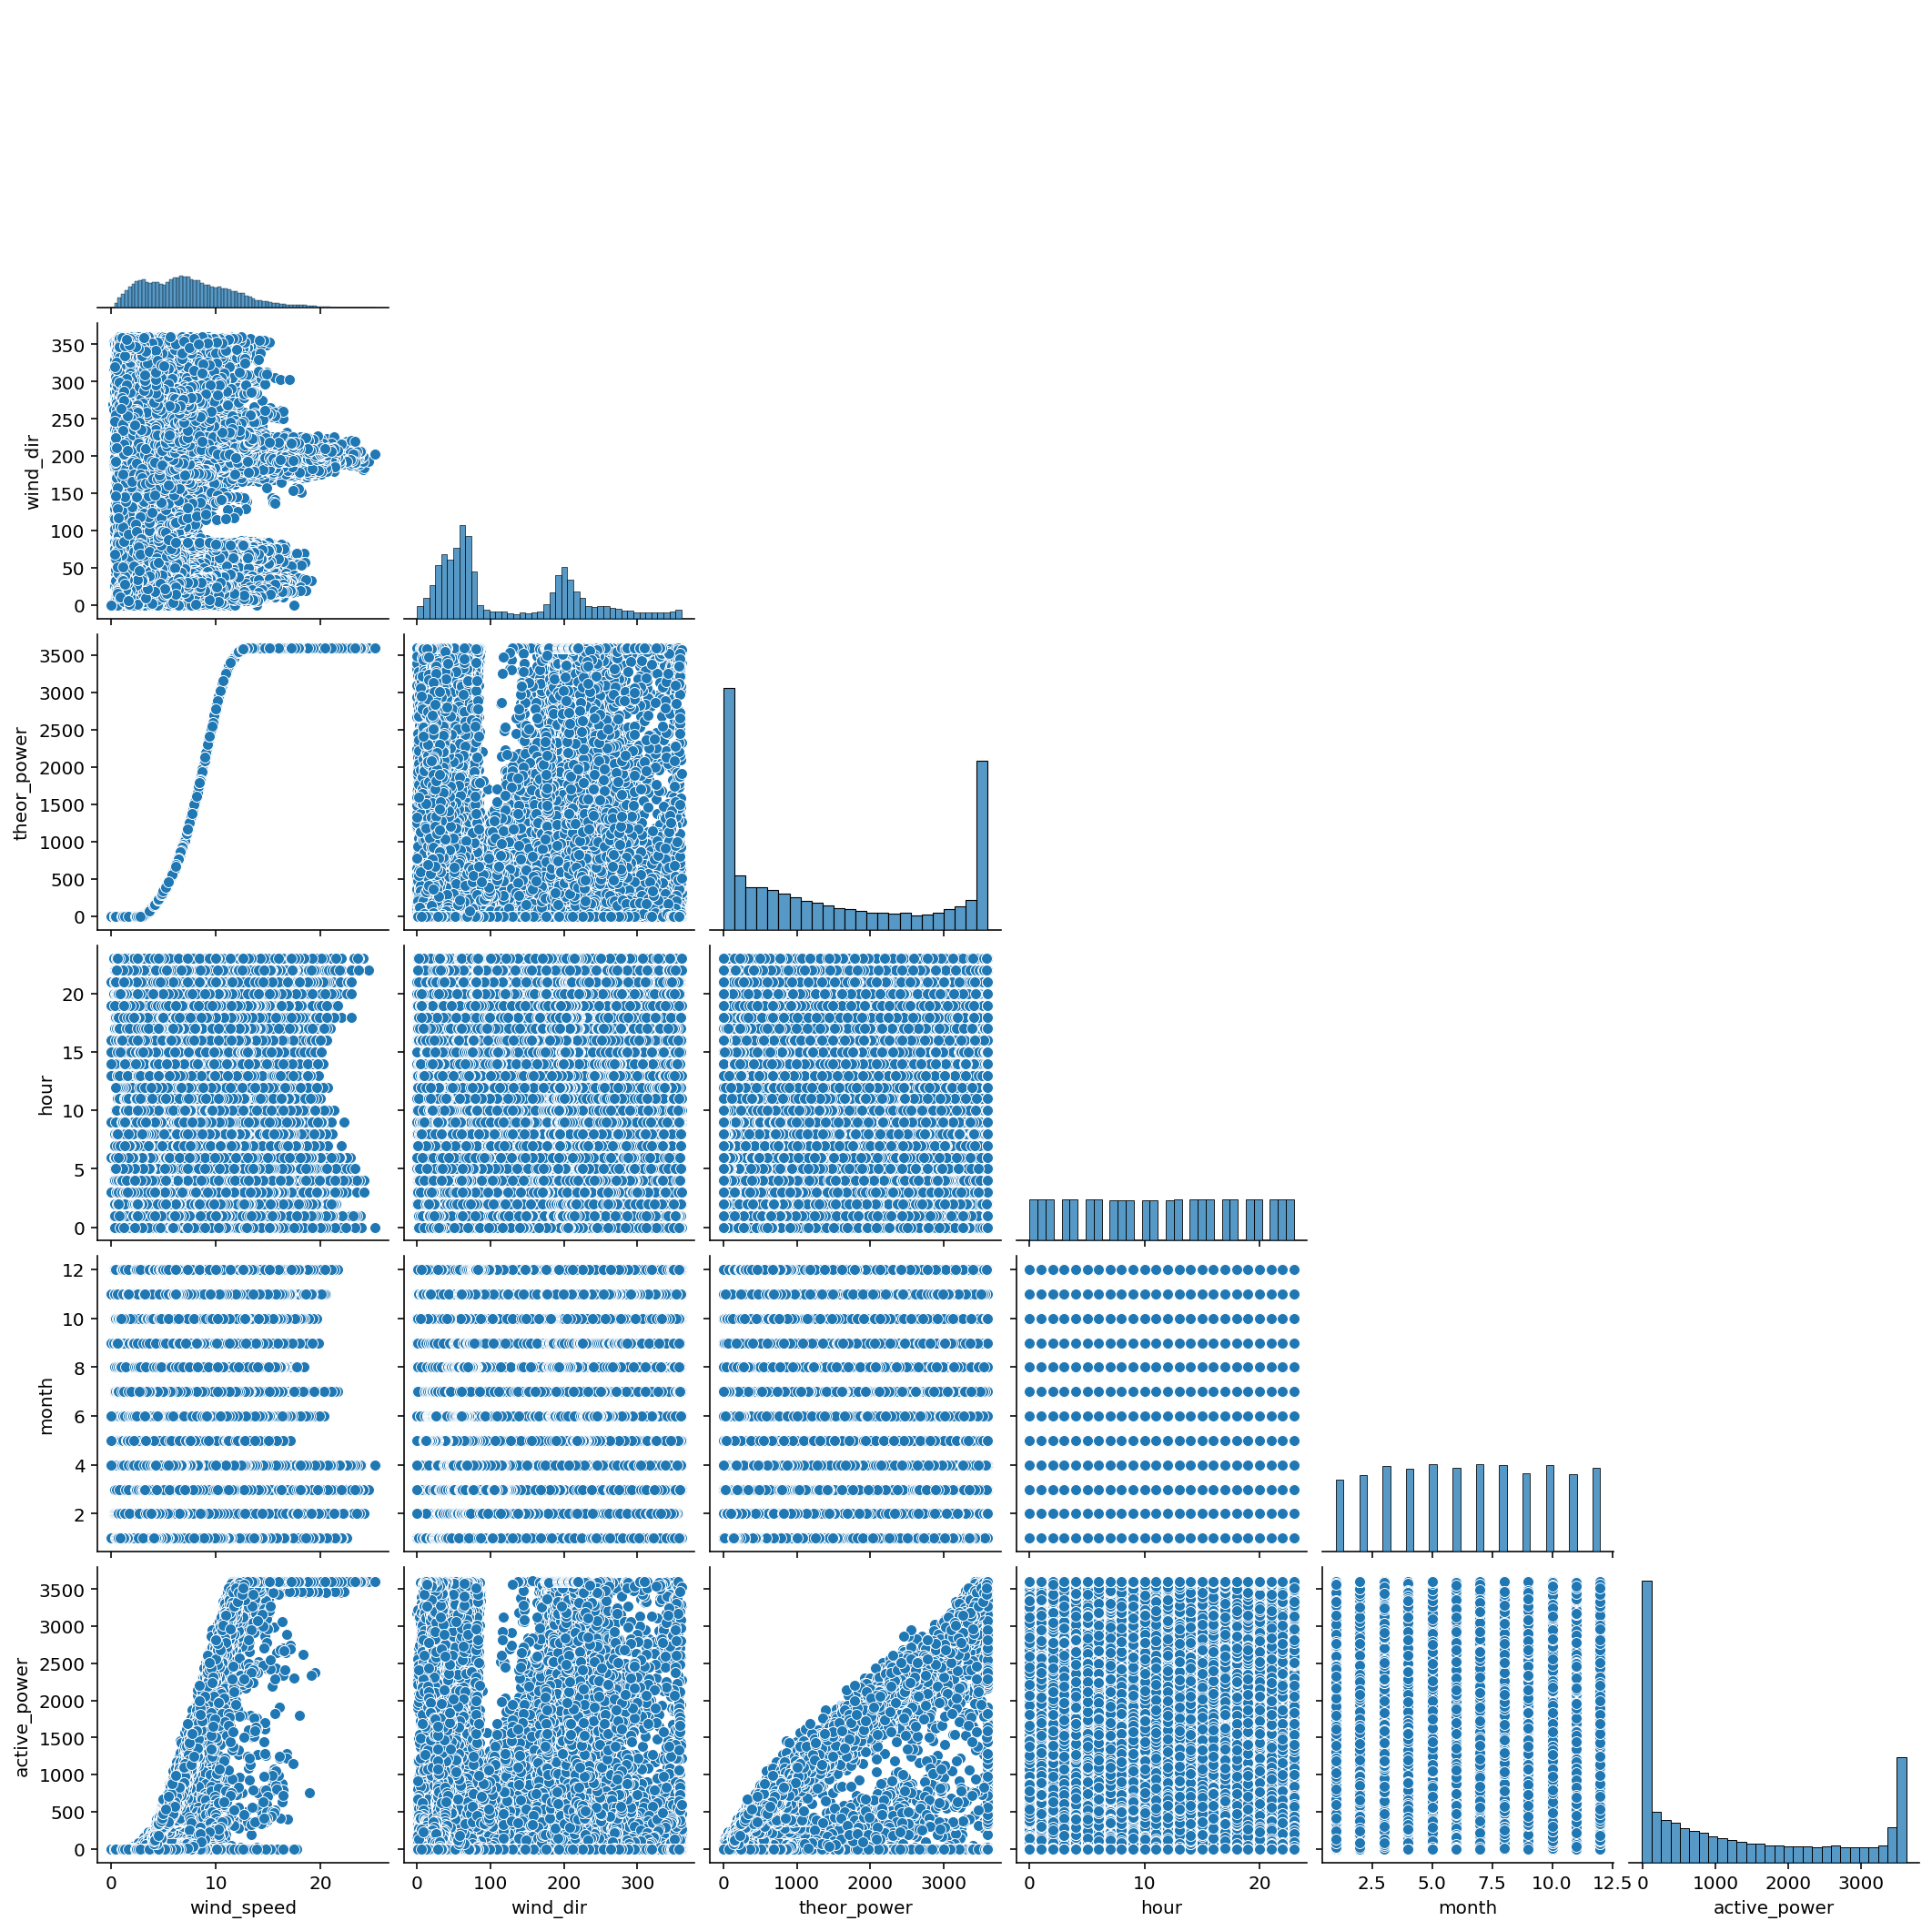

In [42]:
sns.pairplot(df, vars=['wind_speed', 'wind_dir', 'theor_power', 'hour', 'month', 'active_power'], corner=True)

C:\Users\bala\AppData\Local\Temp\ipykernel_6960\3536015096.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


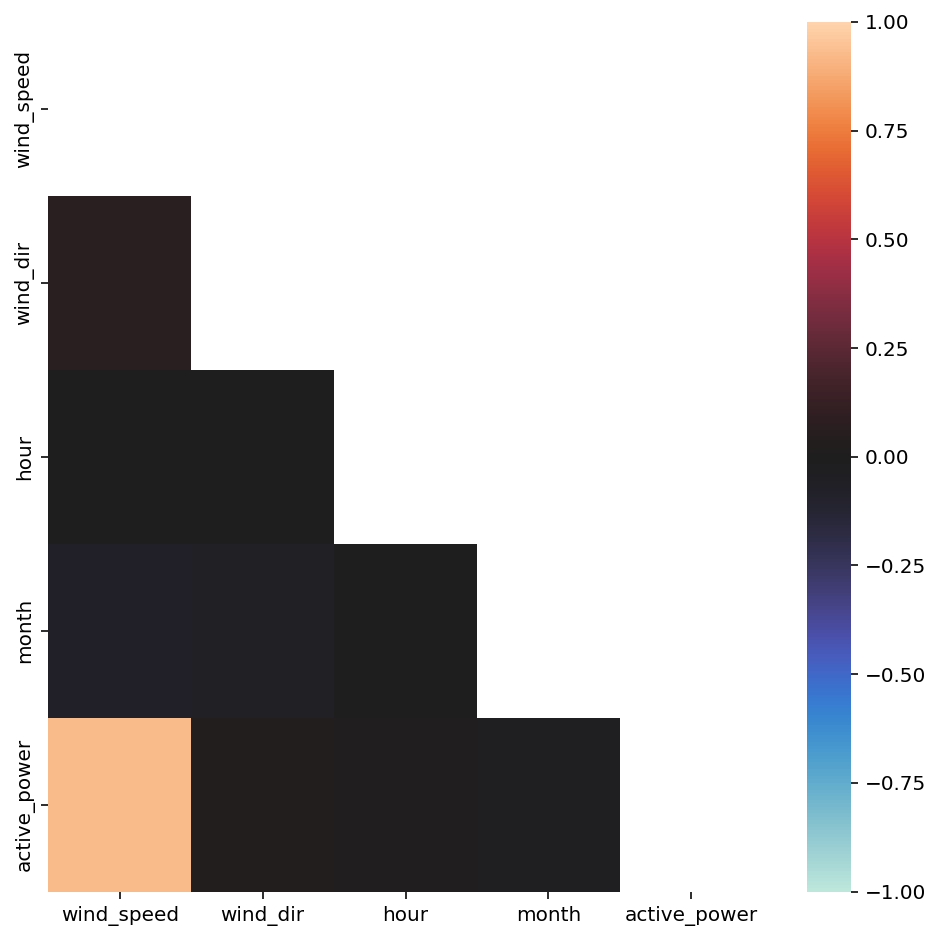

In [43]:
def corr_heatmap(df):    
    plt.figure(figsize=(8,8))

    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='icefire')

corr_heatmap(df_outlier_removed[['wind_speed', 'wind_dir', 'hour', 'month', 'active_power']])

## 6. Power prediction

## Support Vector Machine

In [44]:
# Features and target: use only wind direction and wind speed
X = df_outlier_removed[['wind_dir', 'wind_speed']]
y = df_outlier_removed['active_power']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make pipeline
pipe = make_pipeline(StandardScaler(), SVR())

# 5-fold CV
r2_cv = cross_val_score(pipe, X_train, y_train, cv=5)
print(r2_cv)
print(np.mean(r2_cv))

[0.94164981 0.93732246 0.93972004 0.94354066 0.94329232]
0.9411050586370242


In [48]:
# Fit SVM model
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

# Train R2
print(f'Train R2: {pipe.score(X_train, y_train)}')

# Test R2, MSE, MAE
print(f'Test R2: {pipe.score(X_test, y_test)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred)}')

Train R2: 0.9459030390874197
Test R2: 0.9422862160177913
Test MAE: 159.04878493315968
Test MSE: 92280.41669771016


Text(0, 0.5, 'Predicted Active Power')

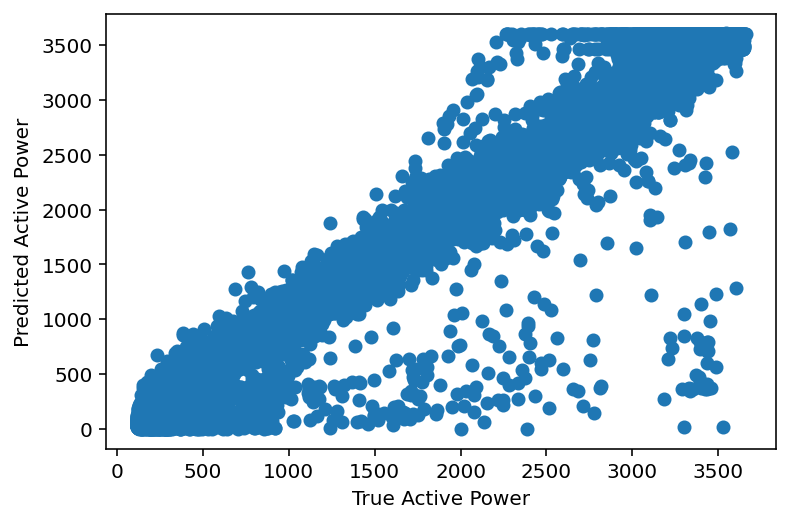

In [47]:
plt.scatter(y_pred, y_test)
plt.xlabel('True Active Power')
plt.ylabel('Predicted Active Power')

In [49]:
y_pred_all = pipe.predict(X)

In [50]:
y_pred = pd.DataFrame(y_pred_all, columns=['active_power'])
y_pred.index = y.index

y_pred

,active_power
date,
2018-01-01 00:00:00,381.701960
2018-01-01 00:10:00,489.786169
2018-01-01 00:20:00,397.055540
2018-01-01 00:30:00,493.664820
2018-01-01 00:40:00,458.073894
...,...
2018-12-31 23:10:00,3043.763481
2018-12-31 23:20:00,1038.773078
2018-12-31 23:30:00,1593.731389


Text(0, 0.5, 'Active Power [kW]')

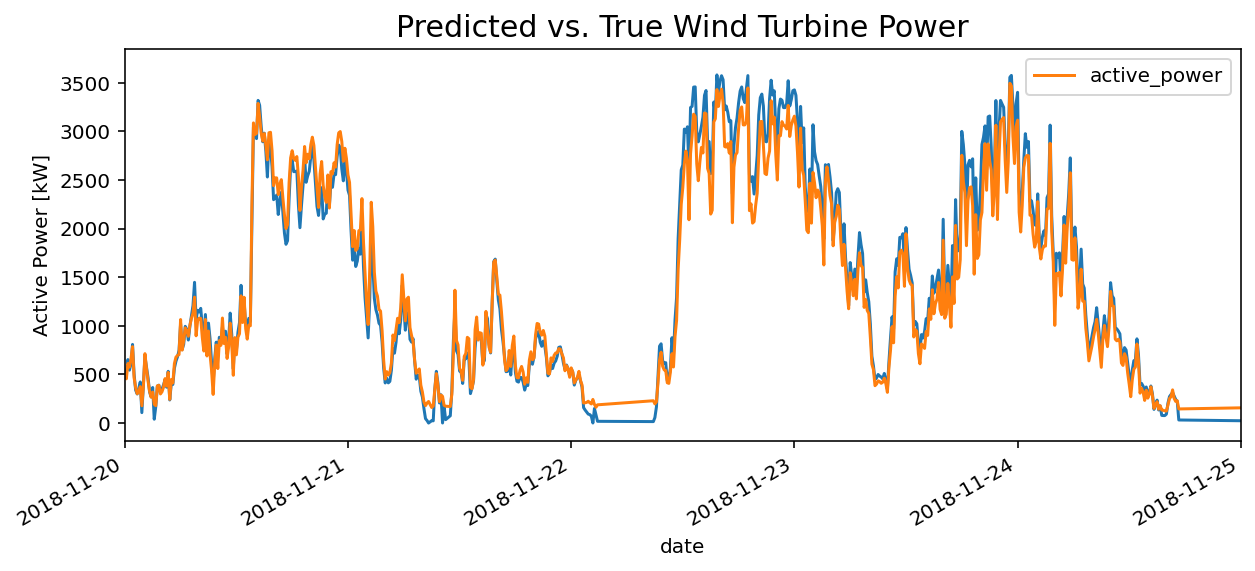

In [51]:
t = df_outlier_removed.index
ax = y.plot(figsize=(10,4), xlim=(np.datetime64('2018-11-20'), np.datetime64('2018-11-25')))
y_pred.plot(figsize=(10,4), xlim=(np.datetime64('2018-11-20'), np.datetime64('2018-11-25')), ax=ax)
plt.title('Predicted vs. True Wind Turbine Power', size=15)
plt.ylabel('Active Power [kW]')

In [52]:
ws = np.linspace(0, 26, 50)
wd = np.linspace(0, 360, 50)
ws, wd = np.meshgrid(ws, wd)

# Prediction space dataframe
X_space = pd.DataFrame({'wind_dir': wd.flatten(), 'wind_speed': ws.flatten()})

y_pred_space = pipe.predict(X_space)

In [53]:
pipe.steps[1][1].get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [54]:
pipe.steps[1][1]._gamma

0.5000000000000001

Text(0.5, 0.92, 'SVM (C=1, Gamma=0.5)')

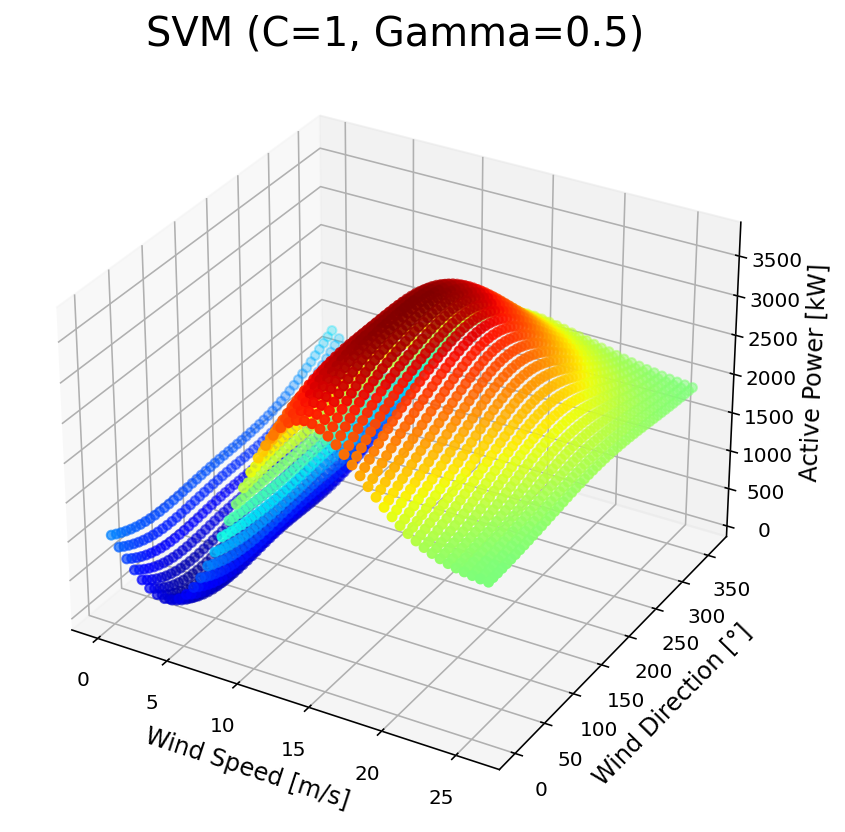

In [55]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_space.wind_speed.values, X_space.wind_dir.values, y_pred_space, 
             c=y_pred_space, cmap='jet')

# ax.scatter3D(X.wind_speed.values, X.wind_dir.values, y, 
#              c='b', alpha=0.2)

ax.set_xlabel('Wind Speed [m/s]', size=12)
ax.set_ylabel('Wind Direction [°]', size=12)
ax.set_zlabel('Active Power [kW]', size=12)
ax.set_title('SVM (C=1, Gamma=0.5)', size=20)